# Project Part 1
By Francisco Muniz

## Introduction/Background

I'm using users' tweets about the Marvel Endgame movie. All these tweets came from tweets and they all have to do something with the Endgame movie. I'll try to predict some words that people have tweeted. Using the words around the word I am trying to predict. This is called embeddings. So I would have context words which are the words that I am trying to predict which is the target word.


## Exploratory Data Analysis


In [18]:
# I put imports I need for the beginning here.
import pandas as pd
import numpy as np
import os
# ...

In [19]:
for dirname, _, filenames in os.walk('../'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../lib/kaggle/gcp.py
../input/tweets/tweets.csv
../working/__notebook_source__.ipynb


In [20]:
df = pd.read_csv('../input/tweets/tweets.csv')
df.head(5)


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN


### Above is the data that will be using to predict specific words. This is showing a the first 5 tweets of the data set that we have. But in whole there are 10,000 tweets. 

<AxesSubplot:>

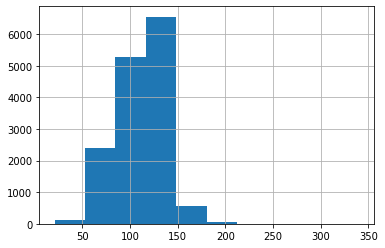

In [21]:
df['text'].str.len().hist()

### This is the data of how many chachters (x-axis) people use to make one tweet. As well how many of people used a specfic number of characters for one tweet (y-axis). 

<AxesSubplot:>

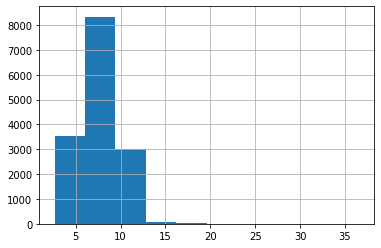

In [22]:
df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### Above is on average word length in each sentence. As we can see the average length of each sentece is from 5-10 words. Lets see if this small change does anything. 

In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

{'but', 'shouldn', "shan't", 'mustn', "haven't", 'are', 'didn', 'at', 'has', 'what', 'itself', "she's", 'above', 'then', "weren't", 'the', 'a', 'is', 'aren', 'these', 'very', 'should', 'off', 'this', 'd', 'my', 'he', 'be', 'most', 'because', 'am', 'with', 'doesn', 'hasn', 'their', 'hadn', "mustn't", 'for', 'me', 'needn', 'your', 'couldn', 'll', 'out', 'ours', "should've", 're', "hadn't", "you're", 'herself', 'been', 'yourselves', 'about', "aren't", 'here', 'do', 'how', 's', "wasn't", 'him', "you'll", "isn't", "hasn't", 'as', 'can', 'haven', 'during', 'theirs', 'no', 'than', 'themselves', 've', 'you', "you've", 'some', 'again', 'an', 'from', "you'd", 'isn', 'was', 'if', 'm', 'doing', 'when', 'of', 'below', 'up', 'own', 'and', 't', 'any', 'under', "shouldn't", 'o', 'those', 'himself', 'while', 'myself', 'into', 'further', 'to', 'were', 'just', 'whom', 'now', 'both', 'yourself', 'before', 'mightn', 'them', 'such', 'so', 'its', 'it', "wouldn't", 'have', 'who', 'same', 'only', 'that', "migh

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Will be finding stop words and to see the most common words. ntlk has multiple langues because these tweets are all english we put english as the langues we are looking for. 

In [34]:

corpus=[]
df['tokens']= df['text'].str.split()
df['tokens']= df['tokens'].values.tolist()
corpus=[word for i in df['tokens'] for word in i]

import collections
from collections import defaultdict, Counter
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

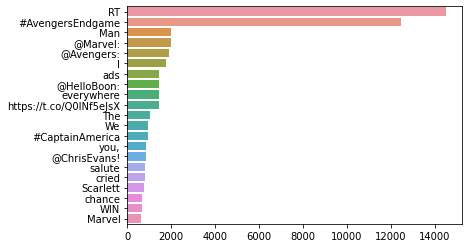

In [33]:
import seaborn as sns
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)